In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [108]:
df=pd.read_csv('https://raw.githubusercontent.com/khubim/Stat_Project/main/Algerian_forest_fires_dataset_UPDATE.csv')
df

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


<b>
Here we can see data is not given in proper format.

As per the dataset information, The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

So we wil divide the dataset based on two region, and concate in a single dataframe

In [109]:
# Bejaia Region Dataset 
df_br=pd.read_csv('https://raw.githubusercontent.com/khubim/Stat_Project/main/Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)
df_br=df_br.loc[:121,:]
df_br['Region']='BR'
df_br

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,BR
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,BR
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,BR
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,BR
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,BR
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,BR
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,BR
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,BR


In [110]:
# Sidi-Bel Abbes Region Dataset

df_sbar=pd.read_csv('https://raw.githubusercontent.com/khubim/Stat_Project/main/Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)
df_sbar=df_sbar.loc[124:, :]
df_sbar['Region']='SBAR'
df_sbar

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,SBAR
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,SBAR
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,SBAR
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,SBAR
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,SBAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,SBAR
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,SBAR
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,SBAR
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,SBAR


In [111]:
data=pd.concat([df_br, df_sbar], axis=0, ignore_index=True)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,BR
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,BR
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,BR
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,BR
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,SBAR
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,SBAR
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,SBAR
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,SBAR


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


<b>Looks like all the features are identified as object but can be converted into numeric, if we remove rows which has strings.

In [113]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,BR
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


In [114]:
# Columns which has null values
print(data.isnull().sum())

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64


In [115]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

<b>'Classes ' column name has extra spaces, we will remove the space

In [116]:
updated_column=data.columns.str.rstrip()
updated_column=updated_column.str.lstrip()
data.columns=updated_column

In [117]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [118]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [119]:
data['Classes']=data['Classes'].str.rstrip()

In [120]:
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [121]:
data[data['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,SBAR


<b>We will drop the row having null because data in DC and FWI are not proper

In [122]:
data=data.dropna()

# Saving dataset for analysis

In [123]:
data.to_csv('forest_fire_dataset_processed.csv', header=True, index=None)

# Import Updated and processed dataset

In [124]:
dataset=pd.read_csv('forest_fire_dataset_processed.csv')
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,BR
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,BR
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,BR
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,BR
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,BR


In [125]:
dataset.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,SBAR
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,SBAR
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,SBAR
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,SBAR
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,SBAR


In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.6+ KB


In [127]:
dataset.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [128]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [129]:
for column in dataset:
    print(column, len(dataset[column].unique()))

day 31
month 4
year 1
Temperature 19
RH 62
Ws 18
Rain 39
FFMC 173
DMC 165
DC 197
ISI 106
BUI 173
FWI 125
Classes 2
Region 2


<b>1-Adding a new column 'day_name' using 'day', 'month', 'year' column
    
<b>2-Converting the 'month' column to exact name  of the month

In [130]:
dataset['day_name']=pd.to_datetime(dataset[['day', 'month', 'year']]).apply(lambda x: x.strftime("%a"))
dataset['month']=pd.to_datetime(dataset[['day', 'month', 'year']]).apply(lambda x: x.strftime("%b"))

In [131]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,day_name
0,1,Jun,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,BR,Fri
1,2,Jun,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,BR,Sat
2,3,Jun,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,BR,Sun
3,4,Jun,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,BR,Mon
4,5,Jun,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,BR,Tue


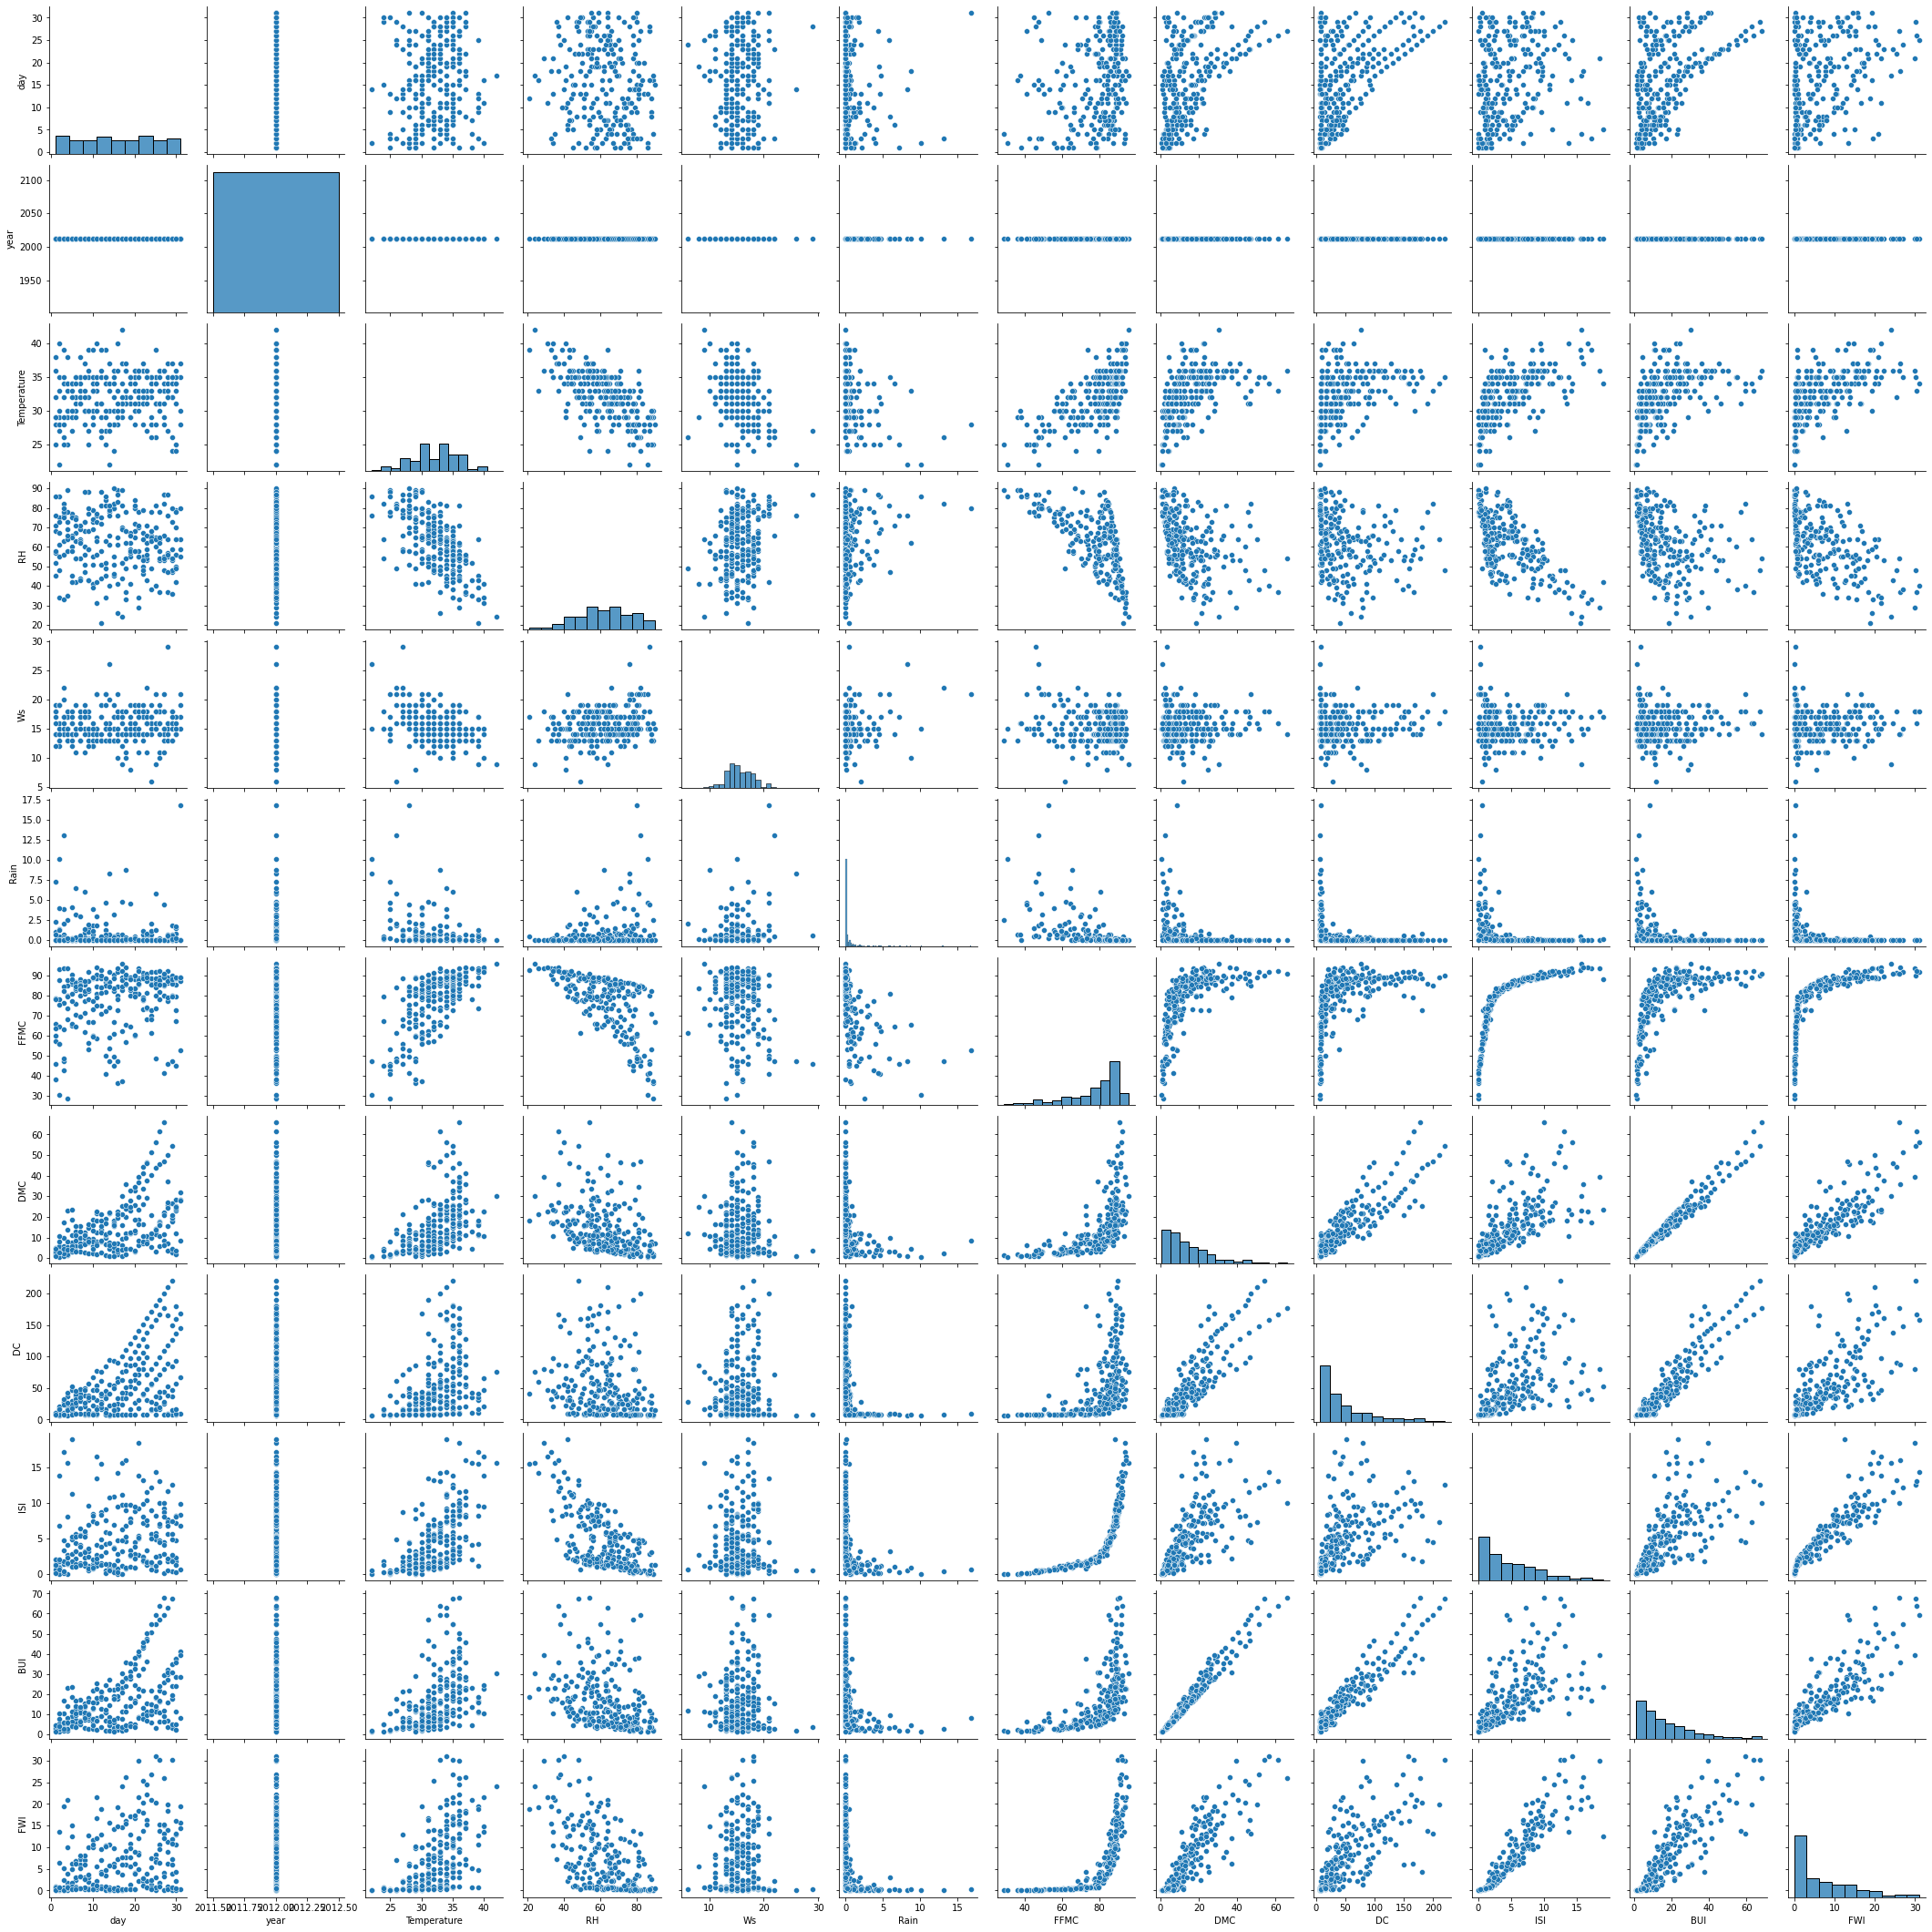

In [132]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='Classes', ylabel='count'>

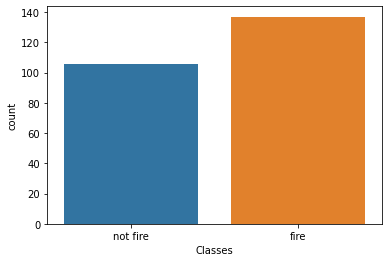

In [133]:
sns.countplot(x=dataset['Classes'])

<AxesSubplot:xlabel='Region', ylabel='count'>

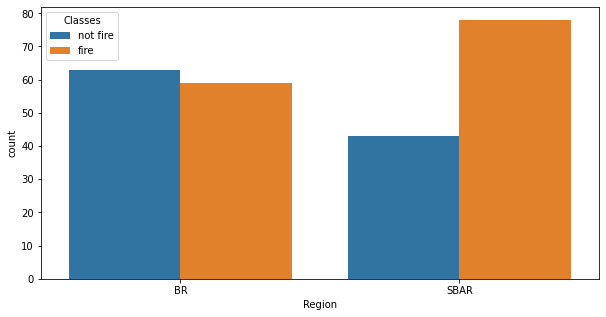

In [135]:
plt.figure(figsize=(10,5))
sns.countplot(x=dataset['Region'], hue=dataset['Classes'])

<Figure size 720x360 with 0 Axes>

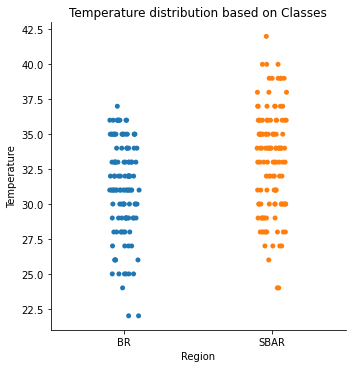

<Figure size 720x360 with 0 Axes>

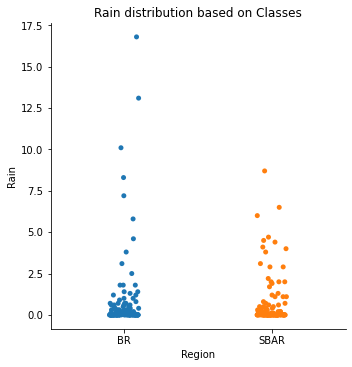

<Figure size 720x360 with 0 Axes>

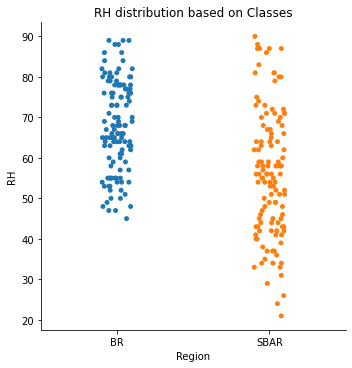

<Figure size 720x360 with 0 Axes>

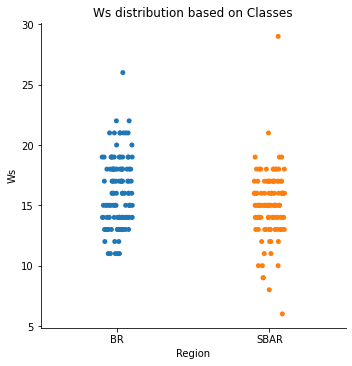

In [136]:
for column in ['Temperature', 'Rain', 'RH', 'Ws']:
    plt.figure(figsize=(10,5))
    sns.catplot(data=dataset, x='Region', y=column)
    plt.title(f'{column} distribution based on Classes')
    plt.show()

<b>Count of fire is high in Sidi-Bel Abbes Region, because Temperature of this region remains high and rainfall is less

<AxesSubplot:xlabel='month', ylabel='count'>

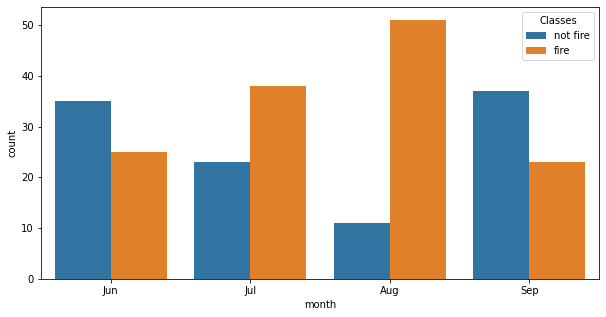

In [137]:
plt.figure(figsize=(10,5))
sns.countplot(x=dataset['month'], hue=dataset['Classes'], order=['Jun', 'Jul', 'Aug', 'Sep'])

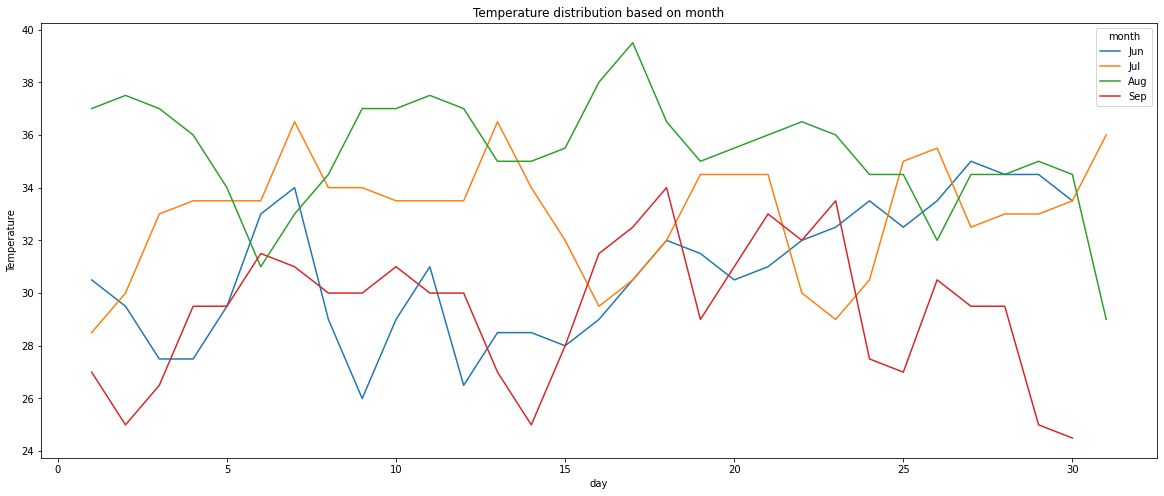

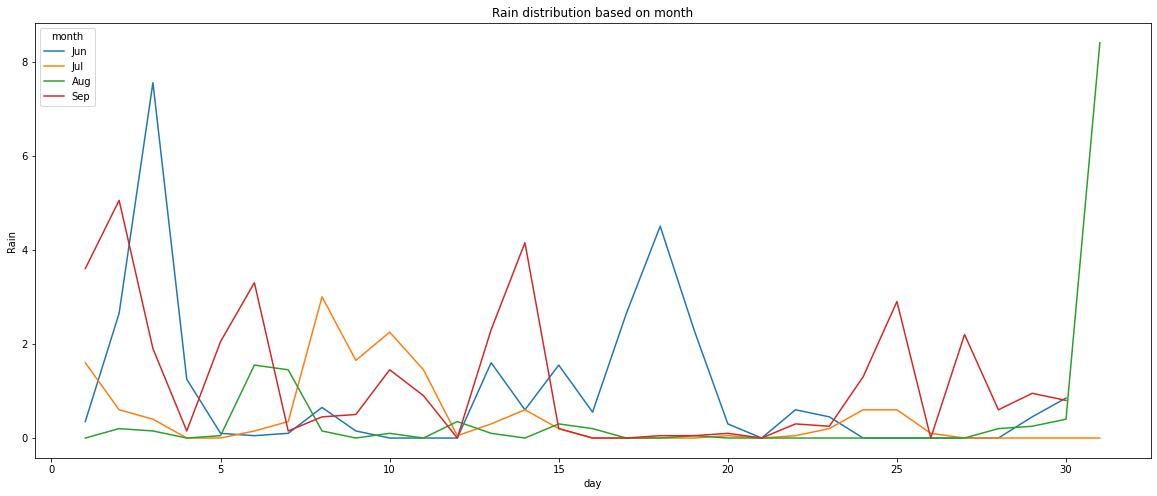

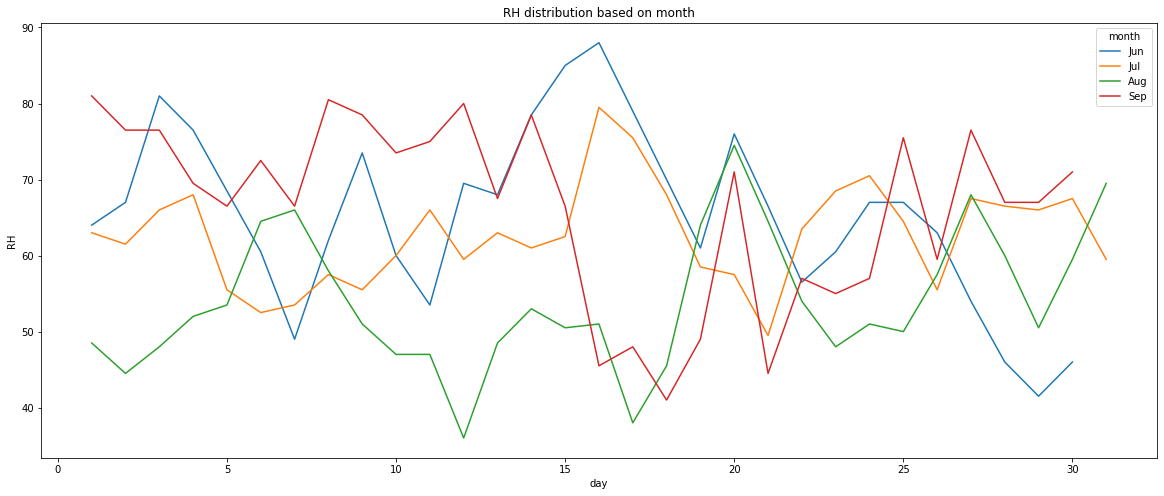

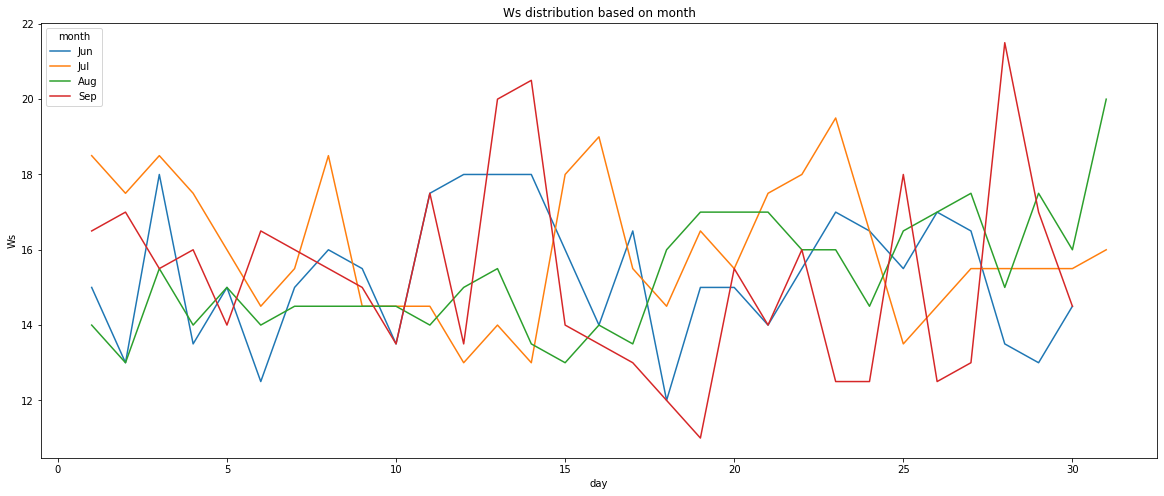

In [140]:
for column in ['Temperature', 'Rain', 'RH', 'Ws']:
    plt.figure(figsize=(20,8))
    sns.lineplot(x=dataset['day'], y=dataset[column], hue=dataset['month'], ci=None, hue_order=['Jun', 'Jul', 'Aug', 'Sep'])
    plt.title(f'{column} distribution based on month')
    plt.show()

<b>From the above analysis we can see that maximum fire was happend in August month, because of the high temperature and low rai

<AxesSubplot:xlabel='day_name', ylabel='count'>

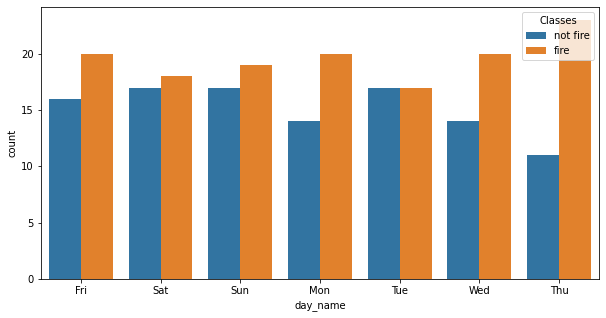

In [141]:
plt.figure(figsize=(10,5))
sns.countplot(x=dataset['day_name'], hue=dataset['Classes'])

Text(0.5, 1.0, 'Fire based on month and Region')

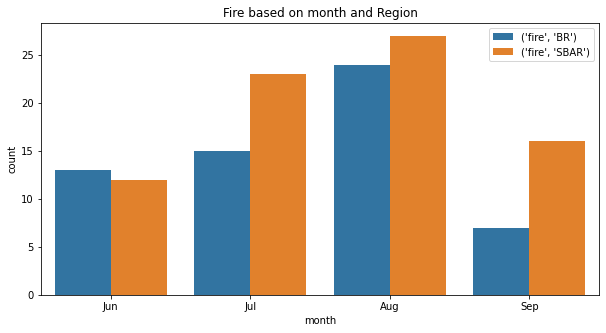

In [142]:
plt.figure(figsize=(10,5))
fire=dataset[dataset['Classes']=='fire']
sns.countplot(x=fire['month'], order=['Jun', 'Jul', 'Aug', 'Sep'], hue=fire[['Classes', 'Region']].apply(tuple, axis=1))
plt.title('Fire based on month and Region')

Text(0.5, 1.0, 'Fire based on day')

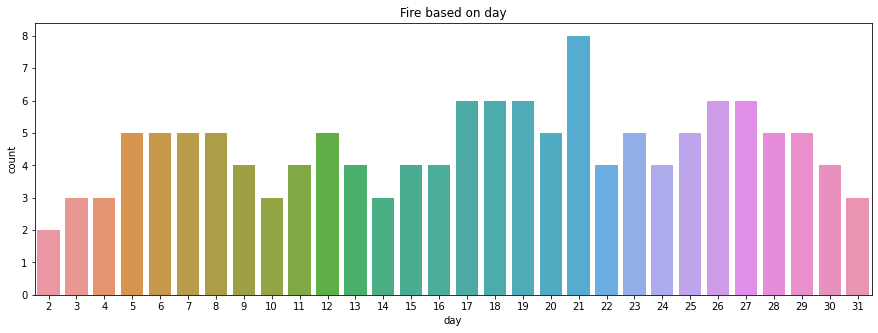

In [143]:
plt.figure(figsize=(15,5))
sns.countplot(x=dataset[dataset['Classes']=='fire']['day'])
plt.title("Fire based on day")

<Figure size 720x360 with 0 Axes>

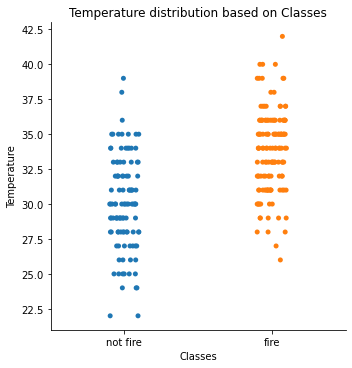

<Figure size 720x360 with 0 Axes>

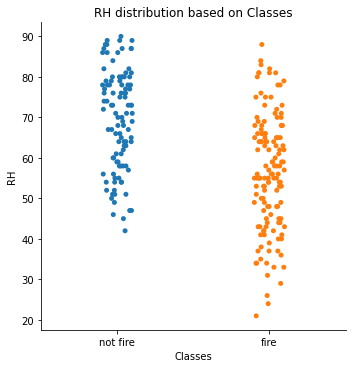

<Figure size 720x360 with 0 Axes>

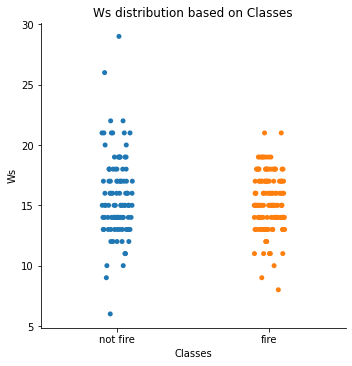

<Figure size 720x360 with 0 Axes>

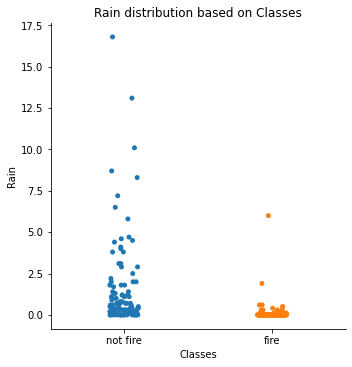

<Figure size 720x360 with 0 Axes>

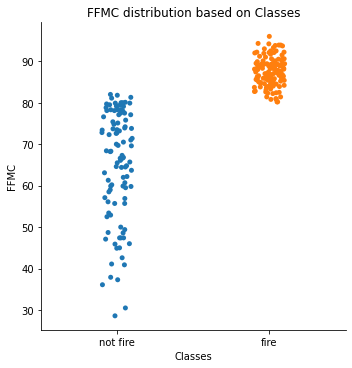

<Figure size 720x360 with 0 Axes>

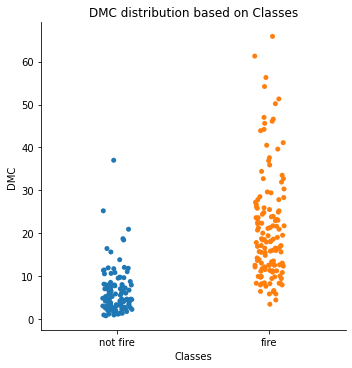

<Figure size 720x360 with 0 Axes>

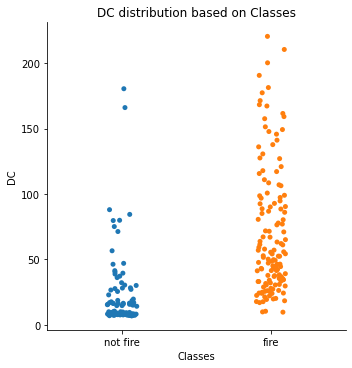

<Figure size 720x360 with 0 Axes>

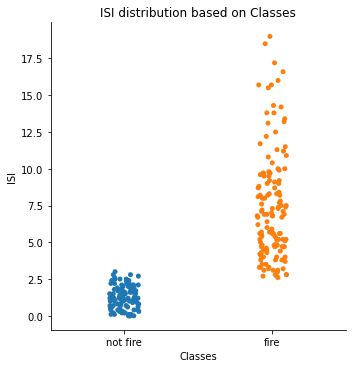

<Figure size 720x360 with 0 Axes>

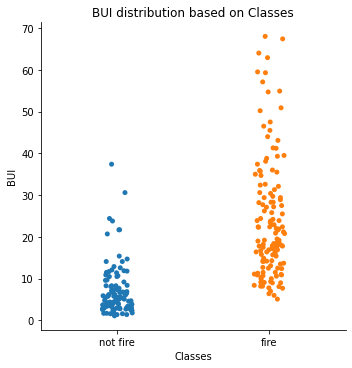

<Figure size 720x360 with 0 Axes>

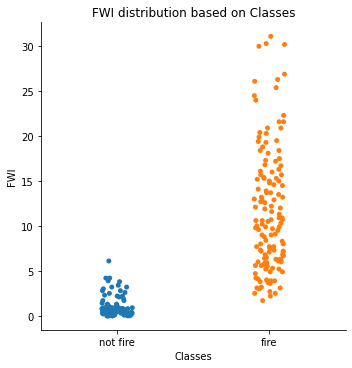

In [144]:
for column in dataset.drop(columns=['day', 'month', 'year', 'day_name', 'Region', 'Classes']):
    plt.figure(figsize=(10,5))
    sns.catplot(data=dataset, x='Classes', y=column)
    plt.title(f'{column} distribution based on Classes')
    plt.show()

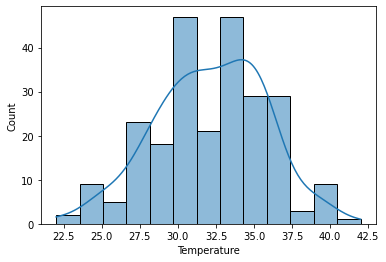

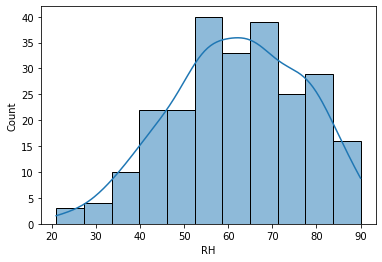

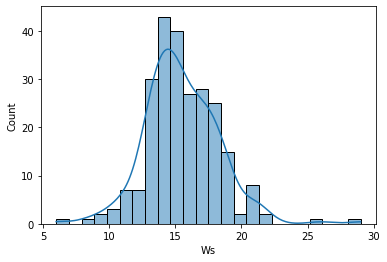

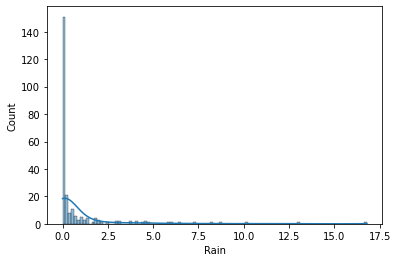

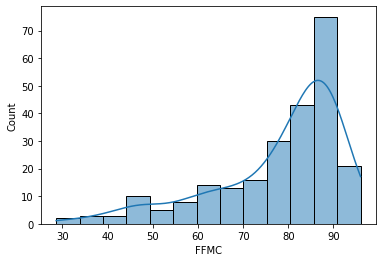

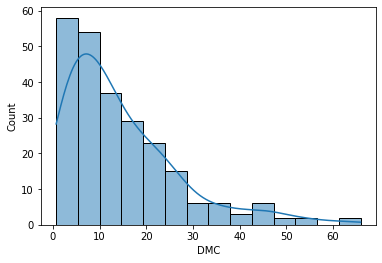

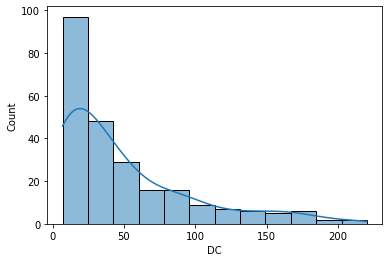

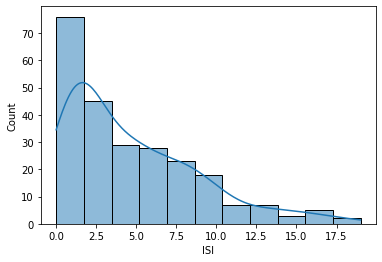

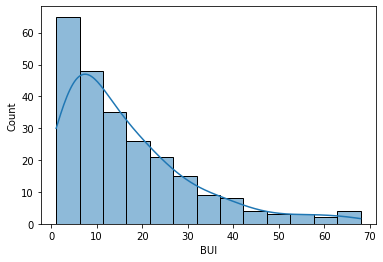

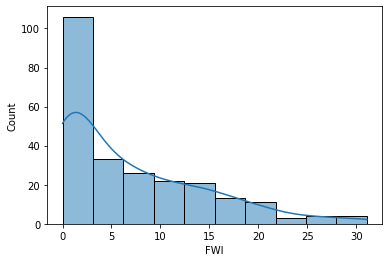

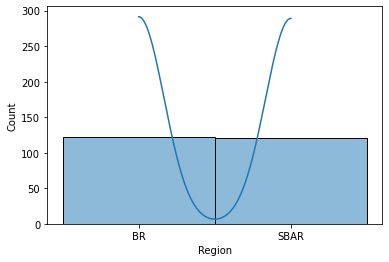

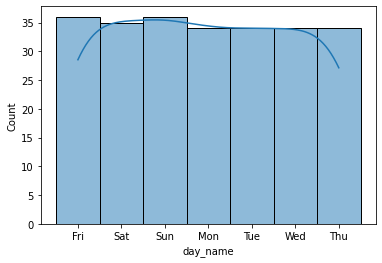

In [145]:
for column in dataset.drop(columns=['Classes', 'year', 'month', 'day']):
    sns.histplot(dataset[column], kde=True)
    plt.show()

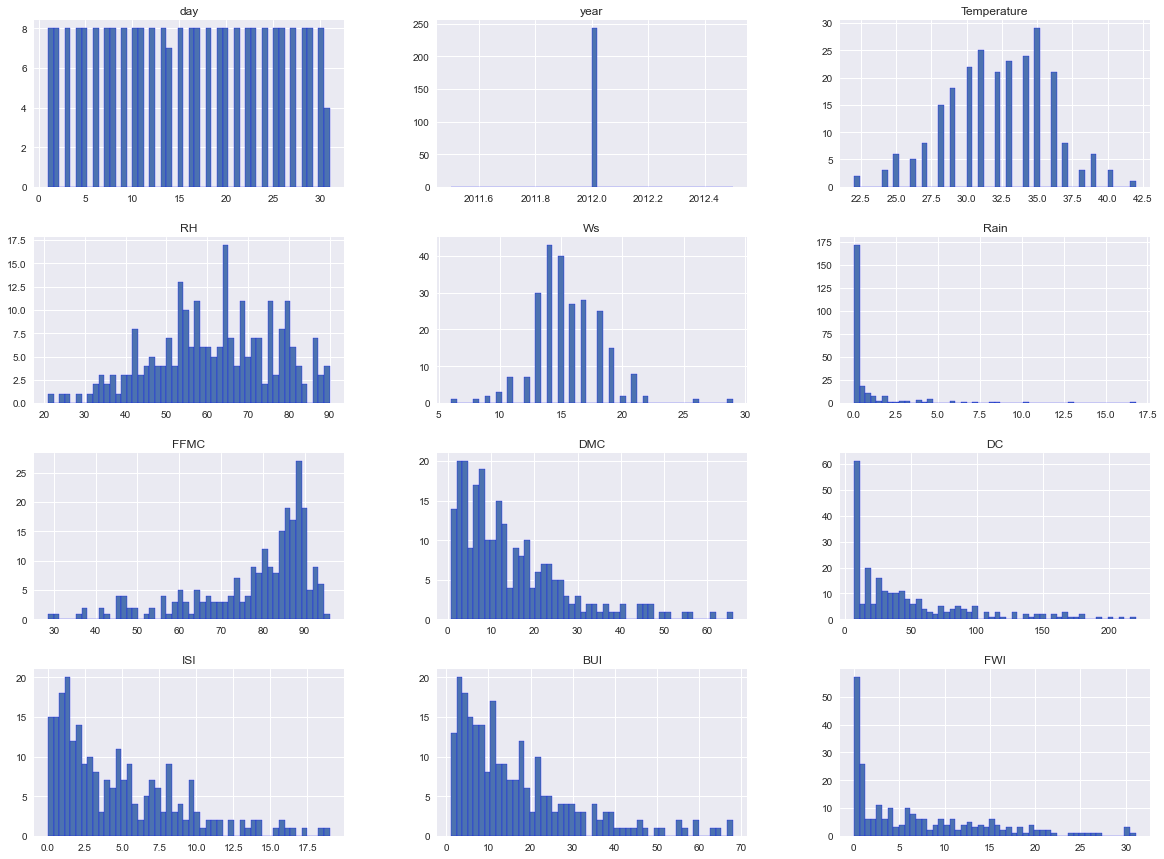

In [146]:
# PLot density plot for all features
plt.style.use('seaborn')
dataset.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [147]:
# Percentage for PieChart
percentage = dataset.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

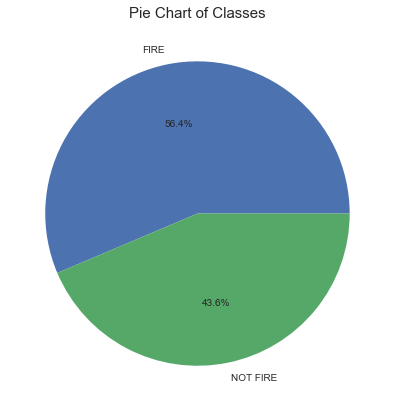

In [148]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

<b>Dropping year and day column because they have no contribution

In [149]:
final_df=dataset.drop(columns=['year', 'day'])

In [150]:
final_df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,day_name
0,Jun,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,BR,Fri
1,Jun,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,BR,Sat
2,Jun,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,BR,Sun
3,Jun,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,BR,Mon
4,Jun,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,BR,Tue


In [151]:
# Percentage for PieChart
percentage = final_df.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

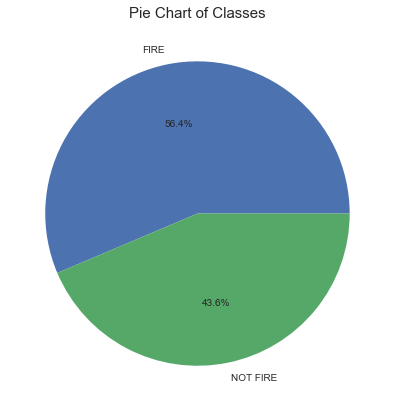

In [152]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

In [154]:
# Check counts
final_df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

<AxesSubplot:>

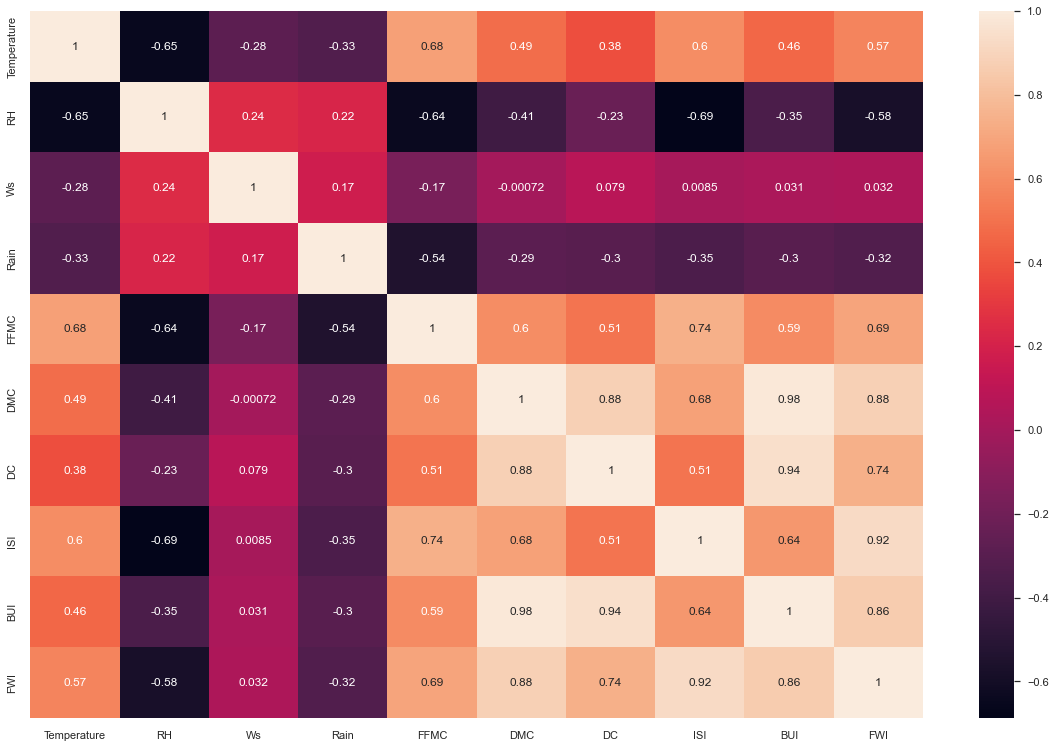

In [173]:
plt.figure(figsize=(20,13))
sns.set(font_scale=1)
sns.heatmap(final_df.corr(), annot=True)

We can see there is high correlation between BUI & DMC(0.98), BUI & DC(0.94), ISI & FWI(0.92)

Here is the information about these columns:

Duff Moisture Code
The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

Drought Code
The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

Buildup Index
The Buildup Index (BUI) is a numeric rating of the total amount of fuel available for combustion. It is based on the DMC and the DC. The BUI is generally less than twice the DMC value, and moisture in the DMC layer is expected to help prevent burning in material deeper down in the available fuel.

Initial Spread Index
The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI.

Fire Weather Index
The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.

In [156]:
final_df.corr(method ='pearson')

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


In [157]:
final_df.corr(method='kendall')

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.490187,-0.166976,-0.224806,0.504952,0.442296,0.365785,0.492859,0.420667,0.491996
RH,-0.490187,1.000000,0.146298,0.133190,-0.509483,-0.358086,-0.239147,-0.486094,-0.327512,-0.437764
Ws,-0.166976,0.146298,1.000000,0.008566,-0.045913,-0.001411,0.045235,0.024093,0.018266,0.026744
Rain,-0.224806,0.133190,0.008566,1.000000,-0.579538,-0.423570,-0.466002,-0.580013,-0.436954,-0.562756
FFMC,0.504952,-0.509483,-0.045913,-0.579538,1.000000,0.629849,0.551945,0.922949,0.616994,0.855672
DMC,0.442296,-0.358086,-0.001411,-0.423570,0.629849,1.000000,0.712468,0.630293,0.914914,0.753846
DC,0.365785,-0.239147,0.045235,-0.466002,0.551945,0.712468,1.000000,0.561814,0.797238,0.669061
ISI,0.492859,-0.486094,0.024093,-0.580013,0.922949,0.630293,0.561814,1.000000,0.620173,0.875291
BUI,0.420667,-0.327512,0.018266,-0.436954,0.616994,0.914914,0.797238,0.620173,1.000000,0.749781
FWI,0.491996,-0.437764,0.026744,-0.562756,0.855672,0.753846,0.669061,0.875291,0.749781,1.000000


<b>Canadian Forest Fire Weather Index (FWI) System
    
This column can be considered for Regression problem

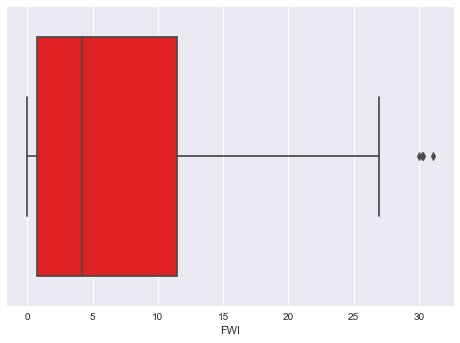

In [162]:
#Boxplot
ax = sns.boxplot(final_df['FWI'], color= 'red')

### Monthwise Fire Analysis

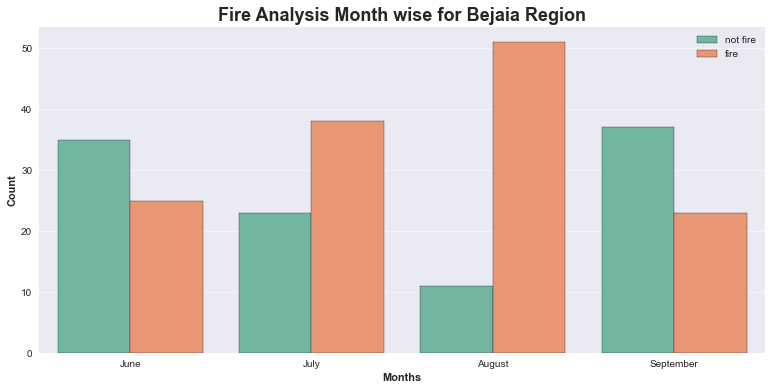

In [164]:
dftemp= final_df.loc[final_df['Region']== 'BR']
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= final_df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

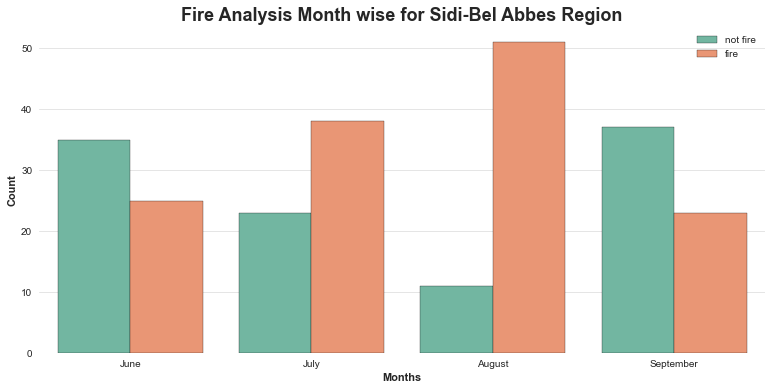

In [166]:
dftemp= final_df.loc[final_df['Region']== 'SBAR']
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= final_df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

<b>Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

<b>Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

<b>Less Fires was on September

In [179]:
final_df.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region', 'day_name'],
      dtype='object')

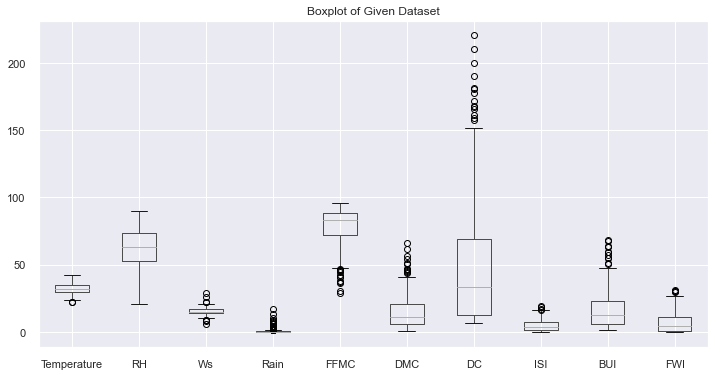

In [184]:
dftemp = final_df.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

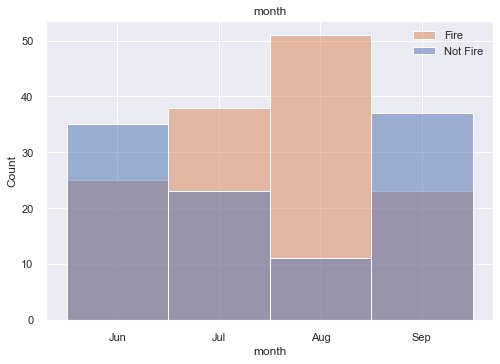

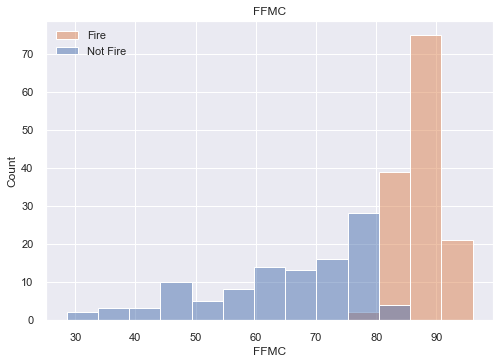

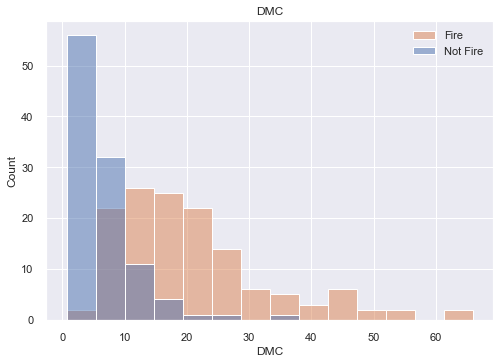

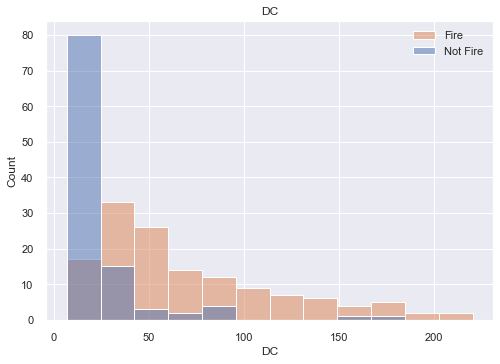

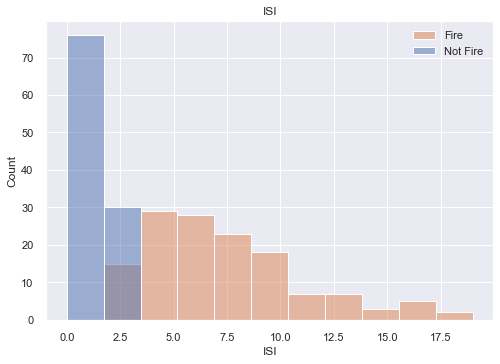

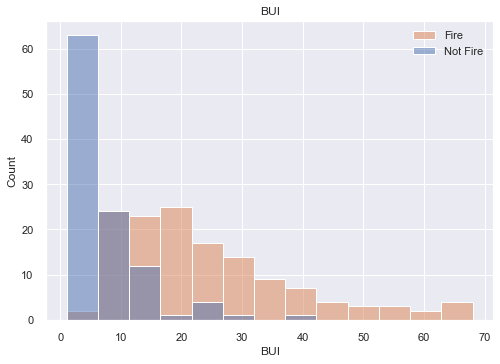

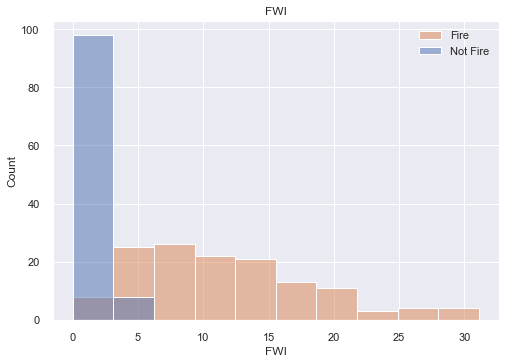

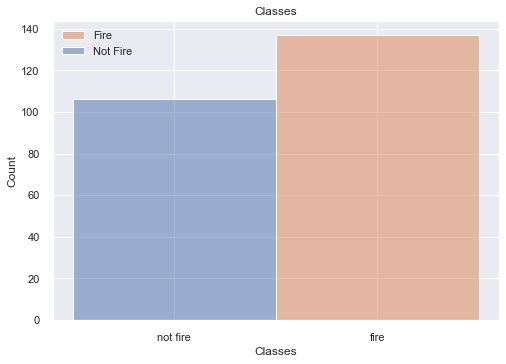

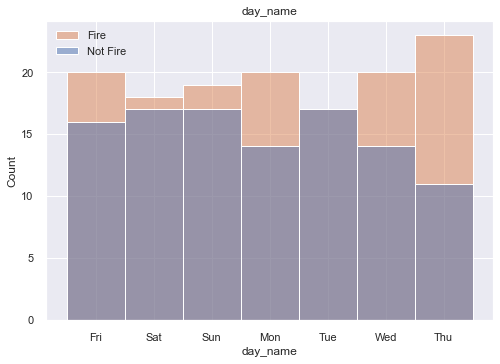

In [187]:
dftemp  =final_df.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

Weather System Report
Temperature Highest Fire counts happened between 30-37 degree Celsius
Rain Highest Fire counts happened when there was no rain to very less rain ie. 0.0 to 0.3.
Wind Speed highest Fire count happened when the wind speed were between 13 to 19 Km/hr.
Relative Humidity highest fire count happened when the RH is between 50 to 80%.
FWI System Components Report
FWI (Canadian Forest Fire Weather Index)

Fine Fuel Moisture Code (FFMC) index which ranges between 28.6 to 92.5, here above 75 has higher chance of Forest fires.

Duff Moisture Code (DMC) index which ranges between 1.1 to 65.9, here 1.1-10 has lower chance of Forest fires whereas above 10-30 DMC has very high evidence of Forest fires in past.

Drought Code (DC) index which ranges between 7 to 220.4, here 0-25 is safe and has lower chance of Forest fires whereas range above 25 DC has higher chance of forest fires.

Initial Spread Index (ISI) index which ranges between 0 to 18, here 0-3 has lower Forest fires and above 3 ISI has higher chance of Forest fires.

Buildup Index (BUI) index which ranges between 1.1 to 68, here 1.1 to 10 has lower Forest fire chance and above 10 BUI has higher chance of forest fires.

Fire Weather Index (FWI) Index which ranges between 1 to 31.1, here 0-3 has lower chance of Forest fires and 3-25 FWI has higher chance of forest fires.